# Main Simulation

Positive Profits: 997
Negative Profits: 3
Mean profit: 85.55399002916711
Standard Deviatin of profits: 45.942544190570096
Highest Profit: 323.96490835686325
Lowest Profit: 0.0


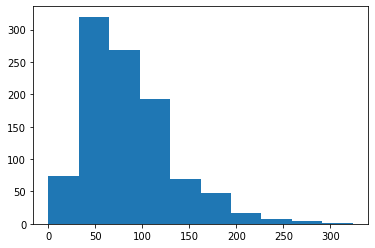

In [1]:
import random
import numpy as np
from matplotlib import pyplot as plt
import os



def sim(stock_price,total_days):
    initial_stock_price=stock_price
    initial_stocks=0
    portfolio=initial_stocks
    cost=0
    price_history=np.zeros(total_days)
    days=np.arange(0,total_days,1)
    pc_mean=-0.2867826682796331
    pc_stdev=3.479385394676354
    pc_daily=np.zeros(total_days)
    #moving_average=np.zeros(total_days)
    
    moving_pc=np.zeros(total_days)
    n=1
    for i in range(total_days):
        percentage_change=np.random.normal(pc_mean,pc_stdev,1)[0]
        pc_daily[i]=percentage_change
        stock_price=stock_price+(stock_price*percentage_change*0.01)
        price_history[i]=stock_price
        #print(f"Day: {i} Stock Price is {stock_price}")
        if percentage_change<-7:
            '''Trading strategy
            '''
            buy=3
            portfolio+=3
    
        #moving_average[i]=np.sum(price_history[0:i])/n
        moving_pc[i]=np.sum(pc_daily[0:i])/n
        n+=1
        pc_mean=(pc_mean*(7000+i)+moving_pc[i])/(7000+i+1)
        #print("New Percentage Change Average:",pc_mean)
    profit=(portfolio*stock_price)-cost
    return profit


n=1000
positive_profits_count=0
profits=np.zeros(n)

for i in range(n):
    profits[i]=sim(10,200)
    if profits[i]>0:
        positive_profits_count+=1

print("Positive Profits:",positive_profits_count)
print("Negative Profits:",n-positive_profits_count)
print("Mean profit:",np.mean(profits))
print("Standard Deviatin of profits:",np.std(profits))
print("Highest Profit:",np.max(profits))
print("Lowest Profit:",np.min(profits))
n,bins,edges=plt.hist(profits,bins=10)

